# 1. Local features
- Extract & calculate local features
- Match features between two images

In [4]:
import cv2
import numpy as np

## Load images
imgs = [cv2.imread('data/image{}.png'.format(i+1)) for i in range(4)]

[ WARN:0@258909.532] global loadsave.cpp:241 findDecoder imread_('data/image3.png'): can't open/read file: check file path/integrity
[ WARN:0@258909.533] global loadsave.cpp:241 findDecoder imread_('data/image4.png'): can't open/read file: check file path/integrity


In [6]:
import numpy as np
import cv2
from helper import featMatch
from helper import computeBrief
from helper import corner_detection

def matchPics(I1, I2):
    """
    Match images

    I1, I2: Images to match
    """

    # Convert Images to GrayScale
    I1_gray = cv2.cvtColor(I1, cv2.COLOR_BGR2GRAY)
    I2_gray = cv2.cvtColor(I2, cv2.COLOR_BGR2GRAY)

    # Detect Features in Both Images
    loc1 = corner_detection(I1_gray)
    loc2 = corner_detection(I2_gray)

    # Obtain descriptors for the computed feature locations
    desc1, locs1 = computeBrief(I1_gray, loc1)
    desc2, locs2 = computeBrief(I2_gray, loc2)

    #Match features using the descriptors
    matches = featMatch(desc1, desc2)

    return matches, locs1, locs2

/home/ailab/git/young/HYU-2024-AUE8089/helper.py:19: FutureWarning: `plot_matches` is deprecated since version 0.23 and will be removed in version 0.25. Use `skimage.feature.plot_matched_features` instead.
  skimage.feature.plot_matches(ax,im1,im2,locs1,locs2,matches,matches_color=color,only_matches=True)


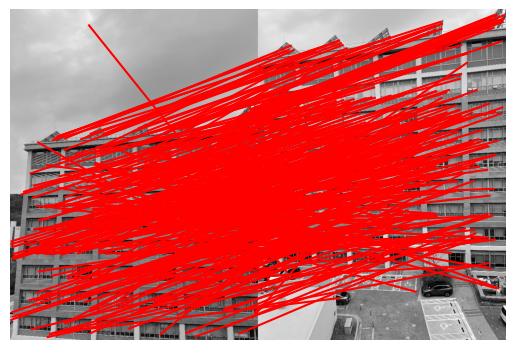

In [7]:
from helper import plotMatches

img1 = cv2.imread('data/image1.png')
img2 = cv2.imread('data/image2.png')

matches, locs1, locs2 = matchPics(img1, img2)
plotMatches(img1, img2, matches, locs1, locs2, color='r')

### BRIEF and Rotations

  0%|          | 0/36 [00:00<?, ?it/s]

Text(0.5, 1.0, 'BRIEF and Rotations')

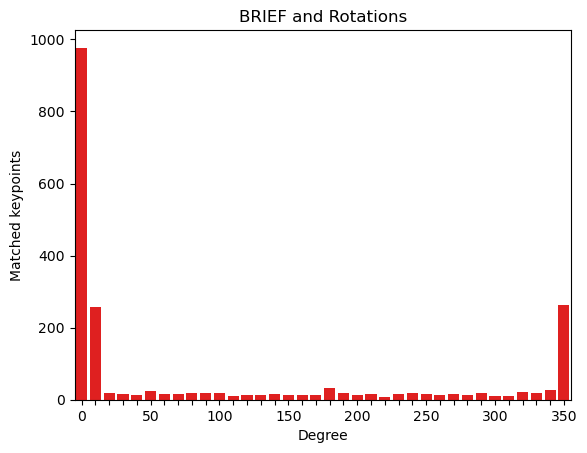

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
from tqdm.auto import trange

cv_cover = Image.open('data/cv_cover.jpg')
match_hist = np.zeros(36)

for i in trange(36):
    # Rotate Image
    cv_rotated = cv_cover.rotate(10 * i, expand=True)

    # Compute features, descriptors and Match features
    matches, locs1, locs2 = matchPics(np.asarray(cv_cover), np.asarray(cv_rotated))

    # Update histogram
    match_hist[i] = len(matches)


#Display histogram
angles = np.arange(0, 360, 10)
ax = sns.barplot(x=angles, y=match_hist, color='r')
_ = plt.xticks(ticks=range(len(match_hist)), labels=[v if i % 5 == 0 else '' for i, v in enumerate(angles)])
plt.xlabel('Degree')
plt.ylabel('Matched keypoints')
plt.title('BRIEF and Rotations')

/home/ailab/git/young/HYU-2024-AUE8089/helper.py:19: FutureWarning: `plot_matches` is deprecated since version 0.23 and will be removed in version 0.25. Use `skimage.feature.plot_matched_features` instead.
  skimage.feature.plot_matches(ax,im1,im2,locs1,locs2,matches,matches_color=color,only_matches=True)


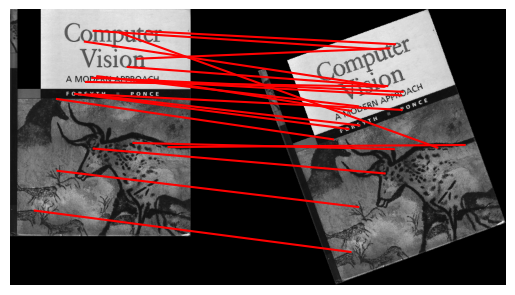

In [9]:
# An example: Rotate 20 degree (counter clockwise)
cv_rotated = cv_cover.rotate(20, expand=True)

I1 = np.asarray(cv_cover)
I2 = np.asarray(cv_rotated)

#Compute features, descriptors and Match features
matches, locs1, locs2 = matchPics(I1, I2)

plotMatches(I1, I2, matches, locs1, locs2, color='r')

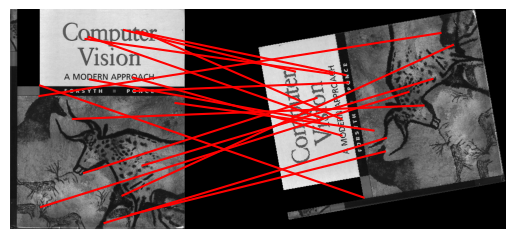

In [10]:
# An example: Rotate 100 degree (counter clockwise)
cv_rotated = cv_cover.rotate(100, expand=True)

I1 = np.asarray(cv_cover)
I2 = np.asarray(cv_rotated)

#Compute features, descriptors and Match features
matches, locs1, locs2 = matchPics(I1, I2)

plotMatches(I1, I2, matches, locs1, locs2, color='r')

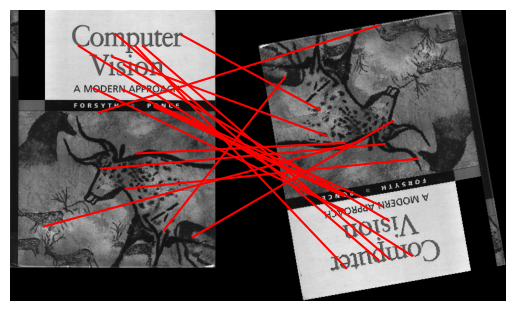

In [11]:
# An example: Rotate 190 degree (counter clockwise)
cv_rotated = cv_cover.rotate(190, expand=True)

I1 = np.asarray(cv_cover)
I2 = np.asarray(cv_rotated)

#Compute features, descriptors and Match features
matches, locs1, locs2 = matchPics(I1, I2)

plotMatches(I1, I2, matches, locs1, locs2, color='r')

### A simple remedy: use ORB feature

In [23]:
import numpy as np
import cv2
from helper import featMatch
from helper import computeORB

def matchPicsORB(I1, I2):
    """
    Match images with ORB

    I1, I2: Images to match
    """

    # Convert Images to GrayScale
    I1_gray = cv2.cvtColor(I1, cv2.COLOR_BGR2GRAY)
    I2_gray = cv2.cvtColor(I2, cv2.COLOR_BGR2GRAY)

    # Obtain descriptors for the computed feature locations
    desc1, locs1 = computeORB(I1_gray)
    desc2, locs2 = computeORB(I2_gray)

    #Match features using the descriptors
    matches = featMatch(desc1, desc2, None)

    return matches, locs1, locs2


  0%|          | 0/36 [00:00<?, ?it/s]

Text(0.5, 1.0, 'ORB and Rotations')

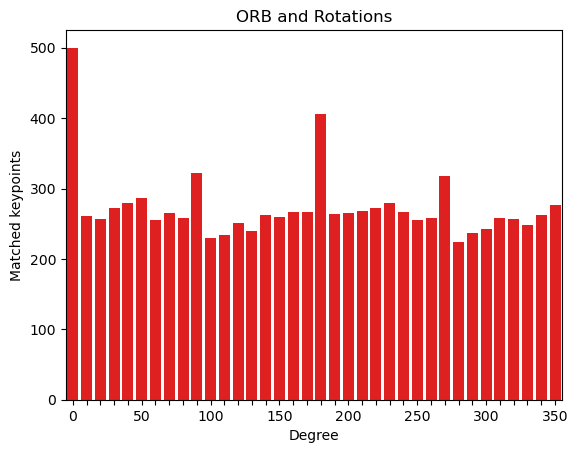

In [24]:
cv_cover = Image.open('data/cv_cover.jpg')
cv_cover = np.array(cv_cover)  # Convert PIL image to numpy array
cv_cover = cv_cover[:, :, ::-1]  # Convert RGB (PIL) to BGR (OpenCV)

match_hist = np.zeros(36)

for i in trange(36):
    # [TODO] Rotate Image
    angle = i * 10
    # print(cv_cover)
    M = cv2.getRotationMatrix2D((cv_cover.shape[1] // 2, cv_cover.shape[0] // 2), angle, 1)
    rotated_cover = cv2.warpAffine(cv_cover, M, (cv_cover.shape[1], cv_cover.shape[0]))

    # [TODO] Compute features, descriptors and Match features
    matches, locs1, locs2 = matchPicsORB(cv_cover, rotated_cover)

    # [TODO] Update histogram
    match_hist[i] = len(matches)


# Display histogram
angles = np.arange(0, 360, 10)
ax = sns.barplot(x=angles, y=match_hist, color='r')
_ = plt.xticks(ticks=range(len(match_hist)), labels=[v if i % 5 == 0 else '' for i, v in enumerate(angles)])
plt.xlabel('Degree')
plt.ylabel('Matched keypoints')
plt.title('ORB and Rotations')

/Users/soonminh/Documents/Hanyang/Classes/[2024-2][대학원] 3차원비전시스템 (3D Vision System)/Assignment/PA1 - Homography/helper.py:19: FutureWarning: `plot_matches` is deprecated since version 0.23 and will be removed in version 0.25. Use `skimage.feature.plot_matched_features` instead.
  skimage.feature.plot_matches(ax,im1,im2,locs1,locs2,matches,matches_color=color,only_matches=True)


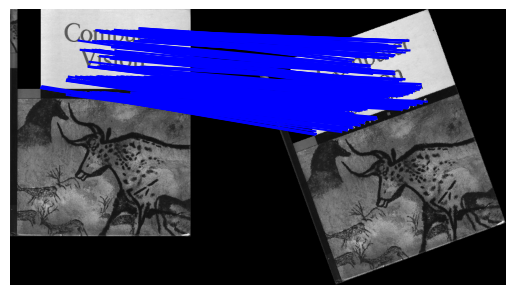

In [11]:
# An example: Rotate 20 degree (counter clockwise)
cv_rotated = cv_cover.rotate(20, expand=True)

I1 = np.asarray(cv_cover)
I2 = np.asarray(cv_rotated)

#Compute features, descriptors and Match features
matches, locs1, locs2 = matchPicsORB(I1, I2)

plotMatches(I1, I2, matches, locs1, locs2, color='b')

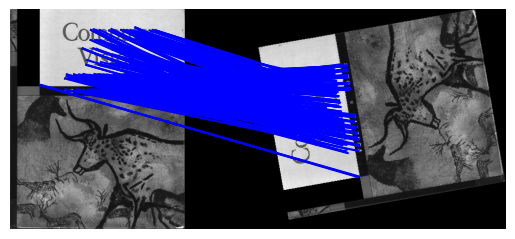

In [12]:
# An example: Rotate 100 degree (counter clockwise)
cv_rotated = cv_cover.rotate(100, expand=True)

I1 = np.asarray(cv_cover)
I2 = np.asarray(cv_rotated)

#Compute features, descriptors and Match features
matches, locs1, locs2 = matchPicsORB(I1, I2)

plotMatches(I1, I2, matches, locs1, locs2, color='b')

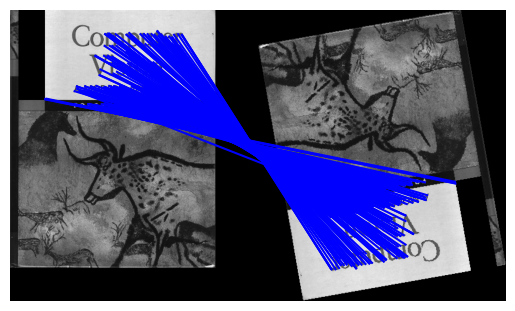

In [13]:
# An example: Rotate 190 degree (counter clockwise)
cv_rotated = cv_cover.rotate(190, expand=True)

I1 = np.asarray(cv_cover)
I2 = np.asarray(cv_rotated)

#Compute features, descriptors and Match features
matches, locs1, locs2 = matchPicsORB(I1, I2)

plotMatches(I1, I2, matches, locs1, locs2, color='b')

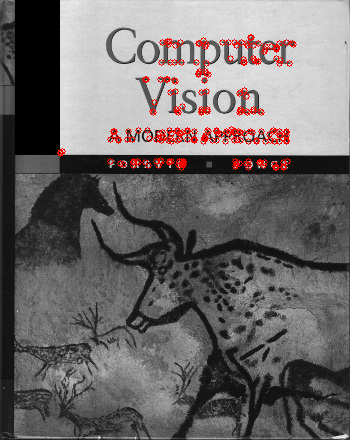

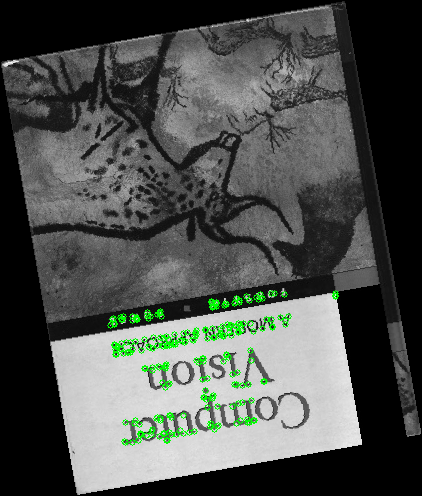

In [20]:
# Double-check the location of matched points
I1 = np.array(cv_cover)
I2 = np.array(cv_rotated)

for cy, cx in locs1[matches[:,0]]:
    cv2.circle(I1, (int(cx), int(cy)), radius=3, color=(255,0,0))

for cy, cx in locs2[matches[:,1]]:
    cv2.circle(I2, (int(cx), int(cy)), radius=3, color=(0,255,0))

display(Image.fromarray(I1))
display(Image.fromarray(I2))